In [1]:
%matplotlib inline
from sympy import *
from sympy.plotting import plot
from IPython.display import display
init_printing()

x = symbols("x")
a, b, c = symbols("a b c")
C1, C2, C3 = symbols("C1, C2, C3")
y, f, g, P, Q = symbols('y f g P Q', cls=Function)

## 方程式

In [2]:
expr = Eq(x**2+3*x-4)
display(expr, solveset(expr, x)) # solve()という関数もあるがsolveset()が推奨されている

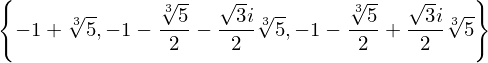

In [3]:
expr = x**3+3*x**2+3*x-4
display(Eq(expr), solveset(expr))

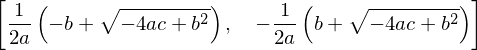

In [4]:
a, b, c = symbols("a b c")
solve(a*x**2+b*x+c, x)

In [5]:
solveset(Gt(x**2, 0), domain=S.Reals)

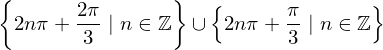

In [6]:
solveset(sin(x) - sqrt(3)/2, domain=S.Reals)

## 微分方程式

### 変数分離型

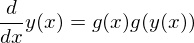

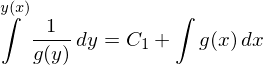

In [7]:
eq = Eq(Derivative(y(x)), g(x)*g(y(x)))
display(eq, dsolve(eq, y(x)))

#### 例題: ロジスティック方程式

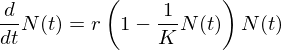

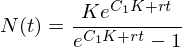

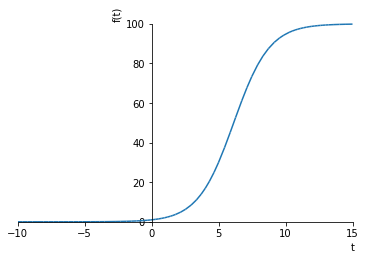

In [8]:
# シンボルを定義
t, r, K = symbols("t r K")
N = symbols("N", cls=Function)
# ロジスティック方程式を定義
eq = Eq(Derivative(N(t)), r*(1-(N(t)/K))*N(t))
display(eq)
# 一般解を求める
ans = dsolve(eq)
display(ans)

# 特殊化する
args = [(K, 100), (r, 0.75)]
init_val = 1.0
func = ans.rhs.subs(args)
# 初期値を方程式の解として求める
c = solve(Eq(func.subs([(t, 0)]), init_val), domain=S.Reals)
# プロットする
plot(func.subs([(C1, c[0])]), (t, -10, 15))

### LiouVille(リウビル)型

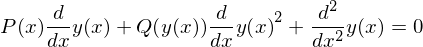

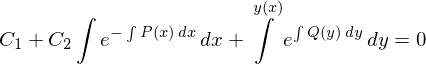

In [9]:
LiouVille = Eq(y(x).diff(x).diff(x) + P(x)*y(x).diff(x) + Q(y(x))*y(x).diff(x)**2)
display(LiouVille, dsolve(LiouVille, y(x)))

#### 例題

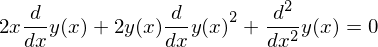

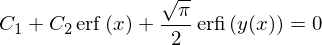

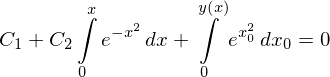

In [10]:
from  sympy.solvers.ode import *
def expand_erfs(expr):
    """ 誤差関数を開く """
    return expr.replace(erf, lambda x: 2/sqrt(pi) * Integral(exp(-x**2), (x, 0, x)))\
               .replace(erfi, lambda x: 2/sqrt(pi) * Integral(exp(x**2), (x, 0, x))).simplify()

def constsimp(expr, variable):
    return constantsimp(expr, [c for c in ans.free_symbols if c != variable])
eq = Eq(y(x).diff(x).diff(x) + 2*x*y(x).diff(x) + 2*y(x)*y(x).diff(x) ** 2)
ans = dsolve(eq)
display(eq, ans)
constsimp(expand_erfs(ans), x)

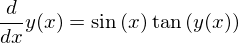

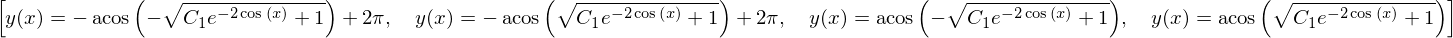

In [11]:
eq = Eq(y(x).diff(), sin(x)*tan(y(x)))
display(eq, dsolve(eq, y(x)))

### 同次型

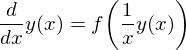

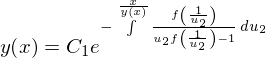

In [12]:
eq = Eq(y(x).diff(x), f(y(x)/x))
display(eq, dsolve(eq, y(x)))

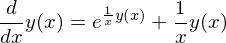

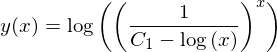

In [13]:
eq = Eq(y(x).diff(x) , exp(y(x)/x) + y(x)/x)
display(eq, dsolve(eq))

### 分数型

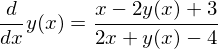

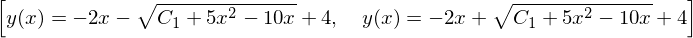

In [14]:
eq = Eq(y(x).diff(x), (x-2*y(x)+3)/(2*x+y(x)-4))
display(eq, dsolve(eq))

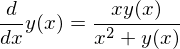

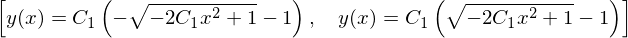

In [15]:
eq = Eq(y(x).diff(x), x*y(x)/(x**2+y(x)))
display(eq, dsolve(eq, hint="lie_group"))

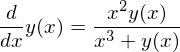

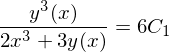

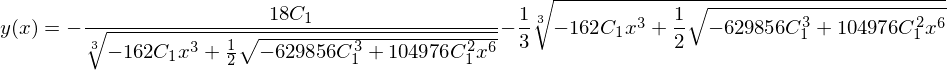

In [16]:
# 自動で解けないのもあるので、そのときは答を代入する
eq = Eq(y(x).diff(x), x**2*y(x)/(x**3+y(x)))
ans_implicit = Eq(y(x)**3/(2*x**3+3*y(x)), 6*C1) # この答えは手で解いたもの
ans = solve(ans_implicit, y(x))[0] # 実数解だけ取る(虚数解でも成り立つだろうけどとりあえず無視)
display(eq, ans_implicit, Eq(y(x), ans), eq.subs([(y(x), ans)]).doit().simplify())

### 定数変化法

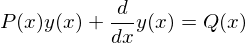

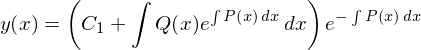

In [24]:
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x))
display(eq, dsolve(eq, y(x), hint="almost_linear"))

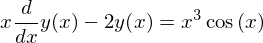

In [18]:
eq = Eq(x*y(x).diff(x) - 2*y(x), x**3*cos(x))
display(eq, dsolve(eq, y(x)))

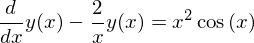

In [29]:
# 一般解から解いてみる
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x))
display(eq.subs([(P(x), -2/x), (Q(x), x**2*cos(x))]),
        dsolve(eq, hint="almost_linear").subs([(P(x), -2/x), (Q(x), x**2*cos(x))]).doit())